# $$H=-\underbrace{\sum^{N-1}_{i}\sum^{N}_{j>i} J_{ij}\sigma^{z}_{i}\sigma^{z}_{j}}_{H1}-\underbrace{\sum^{N}_{i}h_{i}\sigma^{x}_{i}}_{H2}$$


In [131]:
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from qiskit import *
from itertools import product
import random
from IPython.display import Image

In [132]:
def couplings(N):
    h , J = [], []
    for i in range(N):
        h.append(random.choice(range(1,2,2))*1)
    for j in range(N):
        J.append(random.choice(range(1,2,2)))
    return h,J

print("h=",couplings(6)[0],"\nJ=",couplings(6)[1])

h= [1, 1, 1, 1, 1, 1] 
J= [1, 1, 1, 1, 1, 1]


In [133]:
#If we want translational symmetry to be respected we have to apply the same angles 
#for every qubit
def param_tight(N,layers):
    if N!=1:
        a = 2*np.pi*np.random.rand(4*layers)
    else:
        a = 2*np.pi*np.random.rand(3*layers)        
    return(a)
print(repr(param_tight(2,1)))

array([2.02984002, 1.96812253, 1.03039274, 6.20073274])


In [134]:
def conv_qubitbook(counts):
    N = len(str(list(counts.items())[0][0]))
    #I did that so that I wont have to include another input to the function
    qubitbook = counts
    for i in qubit_list(N):
        if i not in qubitbook.keys():
            qubitbook[i] = 0
    return qubitbook

In [135]:
def qubit_list(Nqubit):
    li = ['0', '1']
    combs = [''.join(comb) for comb in product(li, repeat = Nqubit)]
    return combs
print(qubit_list(3))

['000', '001', '010', '011', '100', '101', '110', '111']


### Hamiltonians 

In [136]:
import numpy as np

h = 1
J = 1
I = [[1,0],[0,1]]
Z = [[1,0],[0,-1]]
X = [[0,1],[1,0]]
H1d_PBC = np.negative(np.kron(h,X))
H2d_PBC =(np.kron(J,np.kron(Z,Z))+
            np.kron(J,np.kron(Z,Z))+
            np.kron(h,np.kron(X,I))+
            np.kron(h,np.kron(I,X)))
H2d_PBC = np.negative(H2d_PBC)
H3d_PBC =(np.kron(J,np.kron(np.kron(Z,Z),I))+
            np.kron(J,np.kron(np.kron(I,Z),Z))+
            np.kron(J,np.kron(np.kron(Z,I),Z))+
            np.kron(h,np.kron(np.kron(X,I),I))+
            np.kron(h,np.kron(np.kron(I,X),I))+
            np.kron(h,np.kron(np.kron(I,I),X)))
H3d_PBC = np.negative(H3d_PBC)
H4d_PBC =(np.kron(J,np.kron(np.kron(np.kron(Z,Z),I),I))+
         np.kron(J,np.kron(np.kron(np.kron(I,Z),Z),I))+
         np.kron(J,np.kron(np.kron(np.kron(I,I),Z),Z))+
         np.kron(J,np.kron(np.kron(np.kron(Z,I),I),Z))+
         np.kron(h,np.kron(np.kron(np.kron(X,I),I),I))+
         np.kron(h,np.kron(np.kron(np.kron(I,X),I),I))+
         np.kron(h,np.kron(np.kron(np.kron(I,I),X),I))+
         np.kron(h,np.kron(np.kron(np.kron(I,I),I),X)))
H4d_PBC = np.negative(H4d_PBC)
H5d_PBC =(np.kron(J,np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(Z,I),I),I),Z))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(X,I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(I,X),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(I,I),X),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(I,I),I),X),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(I,I),I),I),X)))
H5d_PBC = np.negative(H5d_PBC)
H6d_PBC =(np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),Z),Z))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(Z,I),I),I),I),Z))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(X,I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(I,X),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),X),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),X),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),X),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),X)))
H6d_PBC = np.negative(H6d_PBC)
H7d_PBC =(   np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),Z),Z),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),Z),Z))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,I),I),I),I),I),Z))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(X,I),I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,X),I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),X),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),X),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),X),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),X),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),X)))
H7d_PBC = np.negative(H7d_PBC)
H8d_PBC =(
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z),I),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),Z),Z),I),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),Z),Z),I))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),Z),Z))+
             np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,I),I),I),I),I),I),Z))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(X,I),I),I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,X),I),I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),X),I),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),X),I),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),X),I),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),X),I),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),X),I))+
             np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),X)))
H8d_PBC = np.negative(H8d_PBC)
H9d_PBC =(
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I),I),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I),I),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I),I),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z),I),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),Z),Z),I),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),Z),Z),I),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),Z),Z),I))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),Z),Z))+
            np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,I),I),I),I),I),I),I),Z))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(X,I),I),I),I),I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,X),I),I),I),I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),X),I),I),I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),X),I),I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),X),I),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),X),I),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),X),I),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),X),I))+
            np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),I),X)))
H9d_PBC = np.negative(H9d_PBC)
H10d_PBC =(
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,Z),I),I),I),I),I),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,Z),Z),I),I),I),I),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),Z),Z),I),I),I),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),Z),Z),I),I),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),Z),Z),I),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),Z),Z),I),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),Z),Z),I),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),Z),Z),I))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),I),Z),Z))+
        np.kron(J,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(Z,I),I),I),I),I),I),I),I),Z))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(X,I),I),I),I),I),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,X),I),I),I),I),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),X),I),I),I),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),X),I),I),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),X),I),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),X),I),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),X),I),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),X),I),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),I),X),I))+
        np.kron(h,np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(I,I),I),I),I),I),I),I),I),X)))
H10d_PBC = np.negative(H10d_PBC)

In [137]:
print(H3d_PBC,"\n",H3d_PBC.shape)

[[-3 -1 -1  0 -1  0  0  0]
 [-1  1  0 -1  0 -1  0  0]
 [-1  0  1 -1  0  0 -1  0]
 [ 0 -1 -1  1  0  0  0 -1]
 [-1  0  0  0  1 -1 -1  0]
 [ 0 -1  0  0 -1  1  0 -1]
 [ 0  0 -1  0 -1  0  1 -1]
 [ 0  0  0 -1  0 -1 -1 -3]] 
 (8, 8)


#  <center> <font color ='#4d4dff' size="10"> Test circuit inversion

In [138]:
def circuit_RR_PBC(N,param0,param1,layers):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    #param4
#   Momentum eigenstate
#     qc.x(qr[0])
#     [qc.cx(qr[i],qr[i+1]) for i in range(N-1)]
#     qc.barrier()
    for l in range(layers):
        if N!=1: 
            [qc.rx(param1[0+4*l],qr[i]) for i in range(N)]
            [qc.ry(param1[1+4*l],qr[i]) for i in range(N)]
            [qc.rz(param1[2+4*l],qr[i])for i in range(N)]
            for i in range(N-1):
                qc.rzz(param1[3+4*l],qr[i],qr[i+1])
            qc.rzz(param1[3+4*l],qr[N-1],qr[0])
        else:
            [qc.rx(param1[0+3*l],qr[i]) for i in range(N)]
            [qc.ry(param1[1+3*l],qr[i]) for i in range(N)]
            [qc.rz(param1[2+3*l],qr[i])for i in range(N)]
        qc.barrier()
    for l in range(layers):
        if N!=1: 
            qc.rzz(-param0[3+4*l],qr[N-1],qr[0])
            [qc.rzz(-param0[3+4*l],qr[N-1-i],qr[N-2-i]) for i in range(N-1)]
            qc.barrier()
            [qc.rz(-param0[2+4*l],qr[i])for i in range(N)]
            [qc.ry(-param0[1+4*l],qr[i]) for i in range(N)]
            [qc.rx(-param0[0+4*l],qr[i]) for i in range(N)]
        else:
            [qc.rz(-param0[2+3*l],qr[i])for i in range(N)]
            [qc.ry(-param0[1+3*l],qr[i]) for i in range(N)]
            [qc.rx(-param0[0+3*l],qr[i]) for i in range(N)] 
        qc.barrier()
    qc.unitary
    [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc

param0=array([4.13676082, 2.24714607, 0.73676261, 5.56662906])
param1=array([5.72343023, 2.35497448, 5.36498991, 0.90134213])


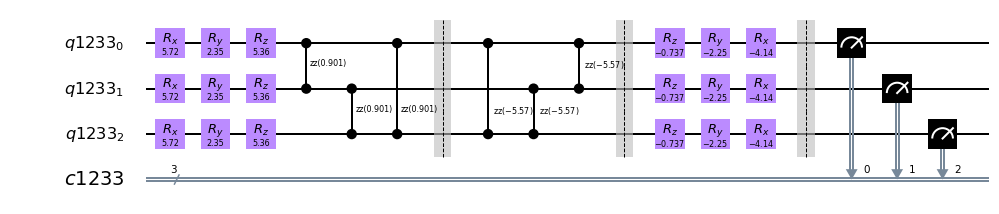

In [139]:
N=3
layers =1
random.seed(999999)
param1 = param_tight(N,layers)
param0 = param_tight(N,layers)
# param2 = [2.9, 6.09, 6.07,2.9, 6.09, 6.07, 2.9, 6.09, 6.07]
qc0 = circuit_RR_PBC(N,param0,param1,layers)
print("param0={}".format(repr(param0)))
print("param1={}".format(repr(param1)))
qc0.draw(output="mpl")

In [140]:
def compute_RR_term_PBC(N,NUM_SHOTS,param0,param1,layers):
    a=[]
    qc = circuit_RR_PBC(N,param0,param1,layers)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS)
    result = job.result()
    counts = result.get_counts()
    counts = conv_qubitbook(counts)
    counts = dict(sorted(counts.items())) #sorts the dictionary of counts according to their key
    [a.append([int(d) for d in str(list(counts)[i])]) for i in range(len(list(counts)))]
    shots = sum(counts.values())
    P = [(i, c/shots) for i, c in counts.items()]
    return P[0][1]

In [141]:
NUM_SHOTS = 10000
N=2
layers = 1
random.seed(999999)
param1 = param_tight(N,layers)
param0 = param_tight(N,layers)
J = couplings(N)[1]
compute_RR_term_PBC(N,NUM_SHOTS,param0,param1,layers)

0.0234

param0=array([4.28043883, 3.64854762, 0.74165687, 3.10251341])
param1=array([1.86880476, 5.0866424 , 3.07006243, 0.54005076])


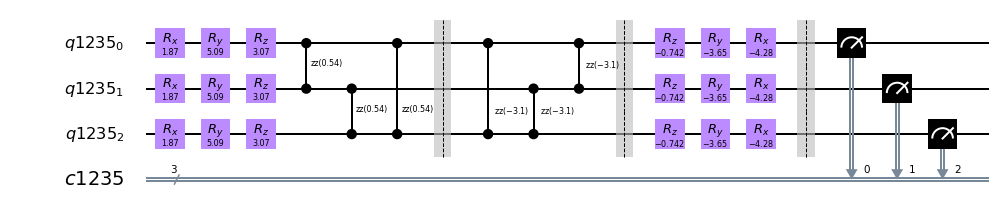

In [142]:
N=3
layers =1
random.seed(999999)
param1 = param_tight(N,layers)
param0 = param_tight(N,layers)
qc = circuit_RR_PBC(N,param0,param1,layers)
print("param0={}".format(repr(param0)))
print("param1={}".format(repr(param1)))
qc.draw(output="mpl")

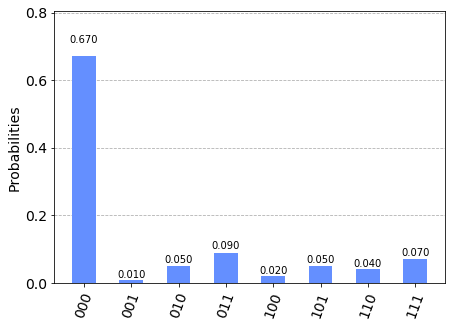

In [143]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots = 100).result().get_counts()
# print("counts:",counts)
counts = conv_qubitbook(counts)
counts = dict(sorted(counts.items()))
# print("new_counts:",counts)
# print("qubit list:",qubit_list(N))
plot_histogram(conv_qubitbook(counts))

#  <center> <font color ='#4d4dff' size="10"> Respecting traslation Symmetry

In [144]:
# For Periodic Boundary Conditions:
def circuit_PBC(N,param,layers):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    #param4
#   Momentum eigenstate
#     qc.x(qr[0])
#     [qc.cx(qr[i],qr[i+1]) for i in range(N-1)]
#     qc.barrier()
    for l in range(layers):
        if N!=1: 
            [qc.rx(param[0+4*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+4*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+4*l],qr[i])for i in range(N)]
            for i in range(N-1):
                qc.rzz(param[3+4*l],qr[i],qr[i+1])
            qc.rzz(param[3+4*l],qr[N-1],qr[0])
        else:
            [qc.rx(param[0+3*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+3*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+3*l],qr[i])for i in range(N)]
        qc.barrier()
    qc.unitary
    [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc

param2=array([0.66588581, 2.17484984, 4.26620893, 5.34845824])


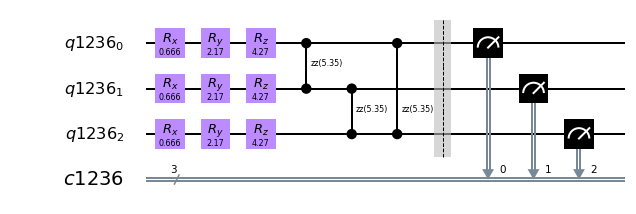

In [145]:
N=3
layers =1
param1 = param_tight(N,layers)
# param2 = [2.9, 6.09, 6.07,2.9, 6.09, 6.07, 2.9, 6.09, 6.07]
qc_PBC = circuit_PBC(N,param1,layers)
print("param2={}".format(repr(param1)))
qc_PBC.draw(output="mpl")

counts: {'101': 8, '110': 14, '111': 45, '010': 4, '011': 17, '100': 8, '001': 4}
new_counts: {'000': 0, '001': 4, '010': 4, '011': 17, '100': 8, '101': 8, '110': 14, '111': 45}
qubit list: ['000', '001', '010', '011', '100', '101', '110', '111']


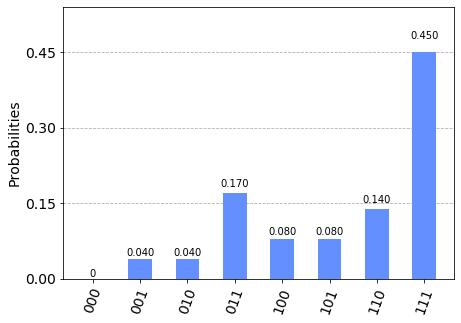

In [146]:
counts = execute(qc_PBC,Aer.get_backend('qasm_simulator'),shots = 100).result().get_counts()
print("counts:",counts)
counts = conv_qubitbook(counts)
counts = dict(sorted(counts.items()))
print("new_counts:",counts)
print("qubit list:",qubit_list(N))
plot_histogram(conv_qubitbook(counts))

In [147]:
# For Periodic Boundary Conditions:
def compute_H1_PBC(N,NUM_SHOTS,param,J,layers):
    H1=0
    a=[]
    qc = circuit_PBC(N,param,layers)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS)
    result = job.result()
    counts = result.get_counts()
    counts = conv_qubitbook(counts) 
    #adds the non-measured states to the list to complete the set of possible 2**N configurations
    counts = dict(sorted(counts.items())) #sorts the dictionary of counts according to their key
    [a.append([int(d) for d in str(list(counts)[i])]) for i in range(len(list(counts)))]
    #now for the periodic boundary condition:
    a.append(a[0])
    #print("len(a):",len(a))
    shots = sum(counts.values())
    P1 = [(i, c/shots) for i, c in counts.items()]
    #print("probs:",P1)
    for i in range(N): #runs over the N pairs of consecutive qubits (in the case of pbc)
        for j in range(2**N): #runs over the set of 2**N states
            if i==N-1:
                if a[j][N-1]==a[j][0]:
                    H1 += J[i]*P1[j][1]
                if a[j][N-1]!=a[j][0]:
                    H1 -= J[i]*P1[j][1]
            else:
                if a[j][i]==a[j][i+1]:
                    H1 += J[i]*P1[j][1]
                if a[j][i]!=a[j][i+1]:
                    H1 -= J[i]*P1[j][1]
#             print("state:'{}' (qubits:{} and {}) H1={}".format(P[j][0],i,i+1,H1))
    #print("H1 =",H1)
    return H1

In [148]:
NUM_SHOTS = 10000
N=2
layers = 1
param = param_tight(N,layers)
J = couplings(N)[1]
compute_H1_PBC(N,NUM_SHOTS,param,J,layers)

0.9068

In [149]:
# For Periodic Boundary Conditions:
def circuit2_PBC(N,param,layers):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    #param4
#   Momentum eigenstate
#     qc.x(qr[0])
#     [qc.cx(qr[i],qr[i+1]) for i in range(N-1)]
#     qc.barrier()
    for l in range(layers):
        if N!=1: 
            [qc.rx(param[0+4*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+4*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+4*l],qr[i])for i in range(N)]
            for i in range(N-1):
                qc.rzz(param[3+4*l],qr[i],qr[i+1])
            qc.rzz(param[3+4*l],qr[N-1],qr[0])
        else:
            [qc.rx(param[0+3*l],qr[i]) for i in range(N)]
            [qc.ry(param[1+3*l],qr[i]) for i in range(N)]
            [qc.rz(param[2+3*l],qr[i])for i in range(N)]
        qc.barrier()
    qc.unitary
    [qc.h(qr[i]) for i in range(N)]
    qc.barrier()
    [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc

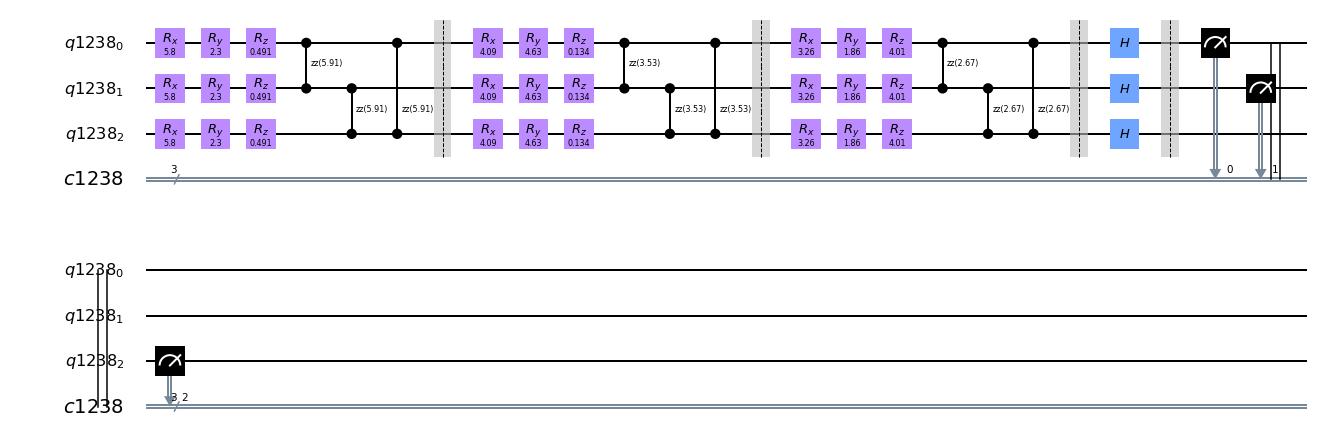

In [150]:
N=3
layers=3
param = param_tight(N,layers)
qc2 = circuit2_PBC(N,param,layers)
qc2.draw(output="mpl")

In [151]:
def compute_H2_PBC(N,NUM_SHOTS,param,h,layers):
    a2 = []
    H2 = 0
    qc2 = circuit2_PBC(N,param,layers)
    job2 = execute(qc2,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS)
    result2 = job2.result()
    counts2 = result2.get_counts()
    counts2 = conv_qubitbook(counts2)
    counts2 = dict(sorted(counts2.items())) #sorts the dictionary of counts according to their key
    [a2.append([int(d) for d in str(list(counts2)[i])]) for i in range(len(list(counts2)))]
    #print("counts after sorting:",counts)
    #split dictionary "count" keys into array elements
    #To account for the case where a register gives only one qubit with probability 1 after all shots
    shots2 = sum(counts2.values())
    P2 = [(i, c/shots2) for i, c in counts2.items()]
    #print("register[{}] a2={}".format(register,a2))
    #print("register[{}] P={}".format(register,P2))
    for i in range(N): #runs over the N qubits
        for j in range(2**N): #runs over the set of 2**N states
            if a2[j][i]==0:
                H2 += h[i]*P2[j][1]
            if a2[j][i]==1:
                H2 -= h[i]*P2[j][1]
    #print("H2 (i={},j={}):{}".format(i,j,H2))
    #print("H2 =",H2)
    return H2

In [152]:
NUM_SHOTS = 100000
N=10
layers = 2
param = param_tight(N,layers)
h = couplings(N)[0]
compute_H2_PBC(N,NUM_SHOTS,param,h,layers)

0.6077000000000001

##  <center> <font color ='#4d4dff' size="10"> Matrix computation

In [153]:
def exp_value(param): 
    N = 2
    layers = 1
    qc0  = circuit_PBC(N,param,layers)
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc0, backend)
    result = job.result()
    psi = result.get_statevector(qc0, decimals=3)
    energy = psi.transpose().conjugate().dot(H2d_PBC).dot(psi).real
    return(energy)

In [154]:
N = 2
layers = 1
param = param_tight(N,layers)

In [155]:
from scipy.optimize import minimize
from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
res = minimize(exp_value, param, args=(), method='COBYLA', jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
res.x
exp_value(res.x)

-3.0

In [156]:
# from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
optimizers = [COBYLA,COBYLA]
opt_energy = []
error  = []
opt_param = []
# optimizer = COBYLA(maxiter=10000, tol=0.001)
for i in range(len(optimizers)):
#     optimizer = optimizers[i](max_trials=1000,  save_steps=1)
    optimizer = optimizers[i](maxiter=10000, tol=0.001)
    ret = optimizer.optimize(num_vars=len(param), objective_function=exp_value, initial_point=param)
    opt_param.append(repr(ret[0]))
    opt_energy.append(exp_value(ret[0]))
# Obtain the output distribution using the final parameters
    print("\nMinimal Energy:",opt_energy)
    print("\nParameters:",opt_param)


Minimal Energy: [-3.000171]

Parameters: ['array([3.5664182 , 5.45456623, 6.69381008, 2.19618316])']

Minimal Energy: [-3.000171, 2.997756]

Parameters: ['array([3.5664182 , 5.45456623, 6.69381008, 2.19618316])', 'array([4.81789761, 4.37716963, 5.6733067 , 2.29323966])']


In [157]:
# param0 = [3.16593601, 0.5870495 , 3.19702625, 3.14733032]
# param1 = [0.14249406, 0.49552168, 0.05262382, 6.41659017]
# param2 = [ 2.7725361 ,  2.76782303,  2.34409267, -0.00460241]
# b =  2.5*np.array(b_h1j1_10d_k3)
# H1 = compute_H1_PBC(N,NUM_SHOTS,param,J,layers)
# H2 = compute_H2_PBC(N,NUM_SHOTS,param,h,layers)
# T1  = b[0]*compute_RR_term_PBC(N,NUM_SHOTS,param0,param,layers)
# T2  = b[1]*compute_RR_term_PBC_noisy(N,NUM_SHOTS,param1,param,layers)
# T3  = b[2]*compute_RR_term_PBC_noisy(N,NUM_SHOTS,param2,param,layers)

In [158]:
import numpy as np
from scipy.optimize import minimize
from pyquil.paulis import PauliSum, PauliTerm
H = PauliSum([PauliTerm.from_list([("X", 2), ("Z", 1),("X", 0)], coefficient=0.2),
              PauliTerm.from_list([("X", 2), ("I", 1),("X", 0)], coefficient=0.9),
              PauliTerm.from_list([("Z", 2), ("Z", 1),("Z", 0)], coefficient=0.3)])

In [159]:
from pyquil.gates import RY, CNOT
n_qubits, depth = 3, 3
def ansatz(params):
    p = Program()
    for i in range(depth):
        p += CNOT(2,0)
        for j in range(n_qubits):
            p += Program(RY(params[j], j))
    return p

In [160]:
# 1
import numpy as np
nqubits = 2
#パウリ演算子を準備する。
pI = np.array([[1+0.0j,0+0.0j],[0+0.0j,1+0.0j]])
pX = np.array([[0+0.0j,1+0.0j],[1+0.0j,0+0.0j]])
pZ = np.array([[1+0.0j,0+0.0j],[0+0.0j,-1+0.0j]])
pY = np.array([[0+0.0j,-1.0j],[0.0+1.0j,0.0+0.0j]])
pHad = (pX+pZ)/np.sqrt(2)
pP0 = (pI+pZ)/2
pP1 = (pI-pZ)/2

In [219]:
Z=[1]*(nqubits)
def H1(nqubits):
    for i in range(nqubits-1):
        for j in range(nqubits-1):
            if(i != j):
                Z[i] = np.kron(pI,Z[i])
            else:
                Z[i] = np.kron(np.kron(pZ,pZ),Z[i])
    return(Z)
# Ide = np.eye(2**nqubits)
print(H1(4))

IndexError: list index out of range

In [200]:
# 2
X=[1]*(nqubits)
Y=[1]*(nqubits)
Z=[1]*(nqubits)
H=[1]*(nqubits)
P0=[1]*(nqubits)
P1=[1]*(nqubits)

for i in range(nqubits):
    for j in range(nqubits):
        if(i != j):
            X[i] = np.kron(pI,X[i])
            Y[i] = np.kron(pI,Y[i])
            Z[i] = np.kron(pI,Z[i])
            H[i] = np.kron(pI,H[i])
            P0[i] = np.kron(pI,P0[i])
            P1[i] = np.kron(pI,P1[i])
        else:
            X[i] = np.kron(pX,X[i])
            Y[i] = np.kron(pY,Y[i])
            Z[i] = np.kron(pZ,Z[i])
            H[i] = np.kron(pHad,H[i])
            P0[i] = np.kron(pP0,P0[i])
            P1[i] = np.kron(pP1,P1[i])
Ide = np.eye(2**nqubits)

In [201]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
print("H=",H)
print("P0=",P0)
print("P1=",P1)

X= [array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]]), array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])]
Y= [array([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j]]), array([[0.+0.j, 0.+0.j, 0.-1.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.-0.j, 0.-1.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])]
Z= [array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j]]), array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j],
       

In [164]:
print(P0[0]+np.dot(P1[0],Z[0]))
print(P0[0]+np.dot(P1[0],Z[1]))
print(P0[1]+np.dot(P1[1],Z[0]))
print(P0[1]+np.dot(P1[1],Z[1]))

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [202]:
ZZ = np.kron(pZ,pZ)
ZZ = expm(ZZ*1j/2)
print(ZZ)

[[0.87758256+0.47942554j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.87758256-0.47942554j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.87758256-0.47942554j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.87758256+0.47942554j]]


In [204]:
# 3備する。
nqubits=2
CZ = [[0 for i in range(nqubits)] for j in range(nqubits)]
CX = [[0 for i in range(nqubits)] for j in range(nqubits)]
ZZ = [[0 for i in range(nqubits)] for j in range(nqubits)]
# print(CZ)
# print(CX)
for i in range(nqubits):
    for j in range(nqubits):
        CZ[i][j]= (P0[i]+np.dot(P1[i],Z[j]))
        CX[i][j]= (P0[i]+np.dot(P1[i],X[j]))
        ZZ[i][j]= expm((np.kron(pZ,pZ))*1.j/2)

In [205]:
print("CZ = ",CZ)
print("CX = ",CX)
print("ZZ = ",ZZ)

CZ =  [[array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]), array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])], [array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]), array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])]]
CX =  [[array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]]), array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
     

In [207]:
#変4る。
from scipy.linalg import expm
def RX(target,angle):
    return expm(-0.5*angle*1.j*X[target])
def RY(target,angle):
    return expm(-0.5*angle*1.j*Y[target])
def RZ(target,angle):
    return expm(-0.5*angle*1.j*Z[target])
def ZZ(target,angle):
    return expm((np.kron(pZ,pZ))*1.j*angle/2)[target]

In [220]:
print(ZZ(0,np.pi/4))

[0.92387953+0.38268343j 0.        +0.j         0.        +0.j
 0.        +0.j        ]


In [38]:
# 5
def StateZeros(nqubits):
    State = np.zeros(2**nqubits)
    State[0]=1
    return State

In [39]:
# 6
M = (-3.8505 * Ide  - 0.2288 * X[1] - 1.0466 * Z[1] - 0.2288 * X[0] +  0.2613 * np.dot(X[0],X[1]) + \
     0.2288 *np.dot(X[0],Z[1]) - 1.0466*Z[0] + 0.2288* np.dot(Z[0],X[1]) +  0.2356 * np.dot(Z[0],Z[1]))/2

In [187]:
print(param_tight(100,1))

[4.44596236 2.03664561 4.86870164 1.94533958]


In [231]:
n_param = 6
global tries
tries=0
global phi_save

In [232]:
# 6.5
def TwoQubitPQC(phi):
    N = 2
    tries +=1
    phi_save.append(phi)
    state = StateZeros(phi_save[i-1])
    for i in range(N):
        state = np.dot(RX(i,phi[0]),state)
        state = np.dot(RY(i,phi[1]),state)
        state = np.dot(RZ(i,phi[3]),state)
    for i in range(N-1):
        state = np.dot(ZZ[i][i+1],state)
    state = np.dot(ZZ[N-1][0],state)
    return state

In [228]:
# 7
n_param = 6
def TwoQubitPQC(phi):
    state = StateZeros(2)
    state = np.dot(RX(0,phi[0]),state)
    state = np.dot(RZ(0,phi[1]),state)
    state = np.dot(RX(1,phi[2]),state)
    state = np.dot(RZ(1,phi[3]),state)
    state = np.dot(CX[1][0],state)
    state = np.dot(RZ(1,phi[4]),state)
    state = np.dot(RX(1,phi[5]),state)
    return state

In [41]:
# 8
def ExpectVal(Operator,State):
    BraState = np.conjugate(State.T) #列ベクトルを行ベクトルへ変換
    tmp = np.dot(BraState,np.dot(Operator,State)) #行列を列ベクトルと行ベクトルではさむ
    return np.real(tmp) #要素の実

In [124]:
def cost(phi):
    nqubits = 1
    layers = 1
#     qc = circuit_PBC(nqubits,phi,layers)
#     backend = Aer.get_backend('statevector_simulator')
#     job = execute(qc, backend)
#     result = job.result()
#     State = result.get_statevector(qc, decimals=3)
    State = np.array([ 0.70710678,  0.70710678])
    print(State)
    Operator = H1d_PBC
    return(ExpectVal(Operator,State))

In [125]:
phi = param_tight(1,1)
print(cost(phi))

[0.70710678 0.70710678]
-0.9999999966439369


In [230]:
from scipy.optimize import minimize
nqubits = 1
layers = 1
phi = param_tight(nqubits,layers)
init = param_tight(nqubits,layers)
cost_val = [] #コスト関数の変化を保存するための関数
#この関数がiteration ごとに呼ばれる。
def callback(phi):
    global cost_val
    cost_val.append(cost(phi))
    
callback(init)
res = scipy.optimize.minimize(cost, init,method='Powell',callback=callback)
plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

ValueError: shapes (16,16) and (4,) not aligned: 16 (dim 1) != 4 (dim 0)

In [229]:
# 9
import scipy.optimize
import matplotlib.pyplot as plt

def cost(phi):
    return ExpectVal(M, TwoQubitPQC(phi))

cost_val = [] #コスト関数の変化を保存するための関数

#この関数がiteration ごとに呼ばれる。
def callback(phi):
    global cost_val
    cost_val.append(cost(phi))

init = np.random.rand(n_param)
callback(init)
res = scipy.optimize.minimize(cost, init,
                              method='Powell',
                              callback=callback)
plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()

ValueError: shapes (16,16) and (4,) not aligned: 16 (dim 1) != 4 (dim 0)

In [43]:
# 10
import scipy.linalg
l, P = scipy.linalg.eigh(M)
print(l[0]) #最小固有値
print(cost(res.x)) #VQEの結果

-2.8626207640766816
-2.862397979051546


In [44]:
# 11
def cost(phi):
    return ExpectVal(M,TwoQubitPQC(phi))+np.random.normal(0,0.01)

def callback(phi):
    global cost_val
    cost_val.append(cost(phi))

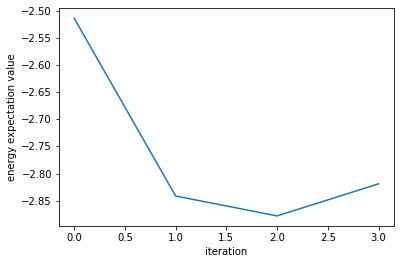

-2.838029651736126


In [45]:
# 12
cost_val=[] # コスト関数の履歴
init = np.random.rand(6)
callback(init)
res = scipy.optimize.minimize(cost, init,
                              method='Powell',
                              callback=callback)
plt.plot(cost_val)
plt.xlabel("iteration")
plt.ylabel("energy expectation value")
plt.show()
print(cost(res.x))

## <center> <font color ='#4d4d33' size="7"> Theoretical Values for Energy

In [46]:
E_h1j1_1d_th = {'0':-1,'1':1}
E_h0j1_1d_th = {'0':0,'1':0}
E_h1j0_1d_th = {'0':-1,'1':1}
E_h1j05_1d_th = {'0':-1,'1':1}
E_h05j1_1d_th = {'0':-0.5,'1':0.5}
E_h2j1_1d_th = {'0':-2,'1':2}
E_h10j1_1d_th = {'0':-10,'1':10}
E_h20j1_1d_th = {'0':-20,'1':20}

E_h1j1_2d_th = {'0':-2.82842712,'1':-2,'2':2,'3':2.82842712}
E_h0j1_2d_th = {'0':-2,'1':-2,'2':2,'3':2}
E_h1j0_2d_th = {'0':-2,'1':0,'2':6.59737022e-17,'3':2}
E_h1j05_2d_th = {'0':-2.23606798,'1':-1,'2':1,'3':2.23606798}
E_h05j1_2d_th = {'0':-2.23606798,'1':-2,'2':2,'3':2.23606798}
E_h2j1_2d_th = {'0':-4.47213595,'1':-2,'2':2,'3':4.47213595}
E_h10j1_2d_th = {'0':-20.09975124,'1':-2,'2':2,'3':20.09975124}
E_h20j1_2d_th = {'0':-40.04996879,'1':-2,'2':2,'3':40.04996879}


E_h1j1_3d_th = {'0':-4,'1':-3.46410162,'2':2.20309881e-16,'3':2.22044605e-16,'4':3.15936513e-16,'5':2,'6':2,'7':3.46410162}
E_h0j1_3d_th = {'0':-3,'1':-3,'2':1,'3':1,'4':1,'5':1,'6':1,'7':1}
E_h1j0_3d_th = {'0':-3,'1':-1,'2':1,'3':1,'4':1,'5':1,'6':1,'7':1}
E_h1j05_3d_th = {'0':-3.23205081,'1':-2.14575131,'2':-0.5,'3':-0.5,'4':0.23205081,'5':1,'6':1.5,'7':3.14575131}
E_h05j1_3d_th = {'0':-3.23205081,'1':-3.14575131,'2':0.23205081,'3':0.5,'4':0.5,'5':1.5,'6':1.5,'7':2.14575131}
E_h2j1_3d_th = {'0':-6.46410162,'1': -4.29150262,'2':-1,'3':-1}
E_h10j1_3d_th = {'0':-30.07878403,'1':-12.07130751,'2':-9,'3':-9}
E_h20j1_3d_th = {'0':-60.03844259,'1':-22.03656906,'2':-19,'3':-19}

E_h1j1_4d_th = {'0':-5.22625186e+00,'1':-4.82842712e+00,'2':-2.16478440e+00,'3':-2.00000000e+00,
'4':-2.00000000e+00,'5':-8.28427125e-01,'6':-4.84058081e-16,'7':-2.45281653e-16,
 '8':1.39709350e-16,'9':3.02403834e-16,'10':8.28427125e-01,'11':2.00000000e+00,
  '12':2.00000000e+00, '13':2.16478440e+00,'14':4.82842712e+00,'15':5.22625186e+00}
E_h0j1_4d_th = {'0':-4,'1':-4,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,
 '8':0,'9':0,'10':0,'11':0,'12':0, '13':0,'14':4,'15':4}
E_h1j0_4d_th = {'0':-4,'1':-2,'2':-2,'3':-2,'4':-2,'5':-7.06946175e-17,'6':-7.06946175e-17,'7':9.53934480e-17,
 '8':1.06812741e-16,'9':1.90819582e-16,'10':3.08182225e-16,'11':2,'12':2, '13':2,'14':2,'15':4}
E_h1j05_4d_th = {'0':-4.27155841,'1':-3.23606798,'2':-2,'3':-2,'4':-1.32430689,'5':-1.23606798,'6':-3.62737996e-16,'7':-9.52421601e-17,
 '8':-9.52421601e-17,'9':-5.69657760e-17,'10':1.23606798,'11':1.32430689,'12':2, '13':2,'14':3.23606798,'15':4.27155841}
E_h05j1_4d_th = {'0':-4.27155841,'1':-4.23606798,'2':-1.32430689 ,'3':-1,'4':-1,'5':-2.36067977e-01,'6':-1.09193728e-17,'7':-1.09193728e-17,
 '8':6.28832596e-17,'9':6.28832596e-17,'10':2.36067977e-01,'11':1,'12':1, '13':1.32430689e+00,'14':4.23606798,'15':4.27155841}
E_h2j1_4d_th = {'0':-8.54311682,'1': -6.47213595,'2':-4,'3':-4}
E_h10j1_4d_th = {'0':-40.1003741,'1':-22.0997512,'2':-20,'3':-20}
E_h20j1_4d_th = {'0':-80.0500468,'1':-42.0499688,'2':-40,'3':-40}


E_h1j1_5d_th = {'0':-6.47213595,'1':-6.15536707,'2':-4,'3':-3.80422607,'4':-3.80422607,'5':-2.35114101,'6':-2.35114101,'7':-2,
 '8':-2,'9':-2,'10':-2,'11':-1.45308506,'12':-1.23606798, '13':-1.23606798,'14':-7.51037906e-16,'15':-4.17945709e-16}
E_h0j1_5d_th = {'0':-5,'1':-5,'2':-1,'3':-1}
E_h1j0_5d_th = {'0':-5,'1':-3,'2':-3,'3':-3}
E_h1j05_5d_th = {'0':-5.32534307,'1':-4.30994062,'2':-3.36985504,'3':-3.36985504}
E_h05j1_5d_th = {'0':-5.32534307,'1':-5.30994062,'2':-2.66908101,'3':-2.36985504}
E_h2j1_5d_th = {'0':-10.65068613,'1': -8.61988123,'2':-6.73971009,'3':-6.73971009}
E_h10j1_5d_th = {'0':-50.12510556,'1':-32.12505108,'2':-30.64997366,'3':-30.64997366}
E_h20j1_5d_th = {'0':-100.06251148,'1':-62.06250806,'2':-60.63463365,'3':-60.63463365}

E_h1j1_6d_th = {'0':-7.72740661,'1':-7.46410162,'2':-5.65685425,'3':-5.46410162}
E_h0j1_6d_th = {'0':-6,'1':-6,'2':-2,'3':-2}
E_h1j0_6d_th = {'0':-6,'1':-4,'2':-4,'3':-4}
E_h1j05_6d_th = {'0':-6.38469456,'1':-5.37780212,'2':-4.64575131,'3':-4.64575131}
E_h05j1_6d_th = {'0':-6.38469456,'1':-6.37780212,'2':-3.90606721,'3':-3.64575131}
E_h2j1_6d_th = {'0':-12.76938913,'1': -10.75560424,'2':-9.29150262,'3':-9.29150262}
E_h10j1_6d_th = {'0':-60.1500964,'1':-42.1500915,'2':-41.0713075,'3':-41.0713075}
E_h20j1_6d_th = {'0':-120.075012,'1':-82.0750116,'2':-81.0365691,'3':-81.0365691}

E_h1j1_7d_th = {'0':-8.98791841,'1':-8.76257254,'2':-7.20775094,'3':-7.02703758}
E_h0j1_7d_th = {'0':-7,'1':-7,'2':-3,'3':-3}
E_h1j0_7d_th = {'0':-7,'1':-5,'2':-5,'3':-5}
E_h1j05_7d_th = {'0':-7.44637965,'1':-6.44323376,'2':-5.86018582,'3':-5.86018582}
E_h05j1_7d_th = {'0':-7.44637965,'1':-7.44323376,'2':-5.08322538,'3':-4.86018582}
E_h2j1_7d_th = {'0':-14.8927593,'1': -12.8864675,'2':-11.7203716,'3':-11.7203716}
E_h10j1_7d_th = {'0':-70.17510987,'1':-52.17510942,'2':-51.35701133,'3':-51.35701133}
E_h20j1_7d_th = {'0':-140.08751368,'1':-102.08751368,'2':-101.30295964,'3':-101.30295964}

E_h1j1_8d_th = {'0':-10.2516618,'1':-10.0546790,'2':-8.69093921,'3':-8.52394525}
E_h0j1_8d_th = {'0':-8,'1':-8,'2':-4,'3':-4}
E_h1j0_8d_th = {'0':-8,'1':-6,'2':-6,'3':-6}
E_h1j05_8d_th = {'0':-8.50908224,'1':-7.50762639,'2':-7.03400063,'3':-7.03400063}
E_h05j1_8d_th = {'0':-8.50908224,'1':-8.50762639,'2':-6.22480391,'3':-6.03400063}
E_h2j1_8d_th = {'0':-21.27120882,'1':-19.27056737,'2': -18.61430531,'3':-18.614305313126557}
E_h10j1_8d_th = {'0':-80.2001253,'1':-62.2001253,'2':-61.5606120,'3':-61.5606120}
E_h20j1_8d_th = {'0':-160.100016,'1':-122.100016,'2':-121.488322,'3':-121.488322}

E_h1j1_9d_th = {'0':-11.5175410,'1':-11.3425636,'2':-10.1283555,'3':-9.97448307}
E_h0j1_9d_th = {'0':-9,'1':-9,'2':-5,'3':-5}
E_h1j0_9d_th = {'0':-9,'1':-7,'2':-7,'3':-7}
E_h1j05_9d_th = {'0':-9.57223979,'1':-8.57155914,'2':-8.18022085,'3':-8.18022085}
E_h05j1_9d_th = {'0':-9.57223979,'1':-9.57155914,'2':-7.34403018,'3':-7.18022085}
E_h2j1_9d_th = {'0':-19.1444796,'1':-17.1431183,'2': -16.3604417,'3':-16.3604417}
E_h10j1_9d_th = {'0':-90.22514098,'1':-72.22514098,'2':-71.71253866,'3':-71.71253865890341}
E_h20j1_9d_th = {'0':-180.11251759,'1':-142.11251759,'2':-139.71717493150734,'3':-139.07594853174825}

E_h1j1_10d_th = {'0':-12.78490644,'1':-12.62750303,'2':-11.53343072,'3':-11.391435051850298}
E_h0j1_10d_th = {'0':-10,'1':-10,'2':-6,'3':-6}
E_h1j0_10d_th = {'0':-10,'1':-8,'2':-8,'3':-8.000000000000064}
E_h1j05_10d_th = {'0':-10.63560441,'1':-9.63528368,'2':-9.30715266,'3':-9.30715265656318}
E_h05j1_10d_th = {'0':-10.63560441,'1':-10.63528368,'2':-8.44857543,'3':-8.307152656563227}
E_h2j1_10d_th = {'0':-21.27120882,'1':-21.27120882,'2': -19.27056737,'3':19.270567365334685}
E_h10j1_10d_th = {'0':-100.25015664,'1':-82.25015664,'2':-81.83063872,'3':-81.83063872075803}
E_h20j1_10d_th = {'0':-200.12501954,'1':-162.12501954,'2':-161.72505495,'3':-161.7250549484299}


In [47]:
b_h1j1_2d_k1  =  [E_h1j1_2d_th['1']-E_h1j1_2d_th['0']]
b_h1j1_2d_k2  =  [E_h1j1_2d_th['2']-E_h1j1_2d_th['0'],E_h1j1_2d_th['2']-E_h1j1_2d_th['1']]
b_h1j1_2d_k3  =  [E_h1j1_2d_th['3']-E_h1j1_2d_th['0'],E_h1j1_2d_th['3']-E_h1j1_2d_th['1'],E_h1j1_2d_th['3']-E_h1j1_2d_th['2']]

In [48]:
b_h1j0_2d_k1  =  [E_h1j0_2d_th['1']-E_h1j0_2d_th['0']]
b_h1j0_2d_k2  =  [E_h1j0_2d_th['2']-E_h1j0_2d_th['0'],E_h1j0_2d_th['2']-E_h1j0_2d_th['1']]
b_h1j0_2d_k3  =  [E_h1j0_2d_th['3']-E_h1j0_2d_th['0'],E_h1j0_2d_th['3']-E_h1j0_2d_th['1'],E_h1j0_2d_th['3']-E_h1j0_2d_th['2']]

In [49]:
b_h1j05_2d_k1  =  [E_h1j05_2d_th['1']-E_h1j05_2d_th['0']]
b_h1j05_2d_k2  =  [E_h1j05_2d_th['2']-E_h1j05_2d_th['0'],E_h1j05_2d_th['2']-E_h1j05_2d_th['1']]
b_h1j05_2d_k3  =  [E_h1j05_2d_th['3']-E_h1j05_2d_th['0'],E_h1j05_2d_th['3']-E_h1j05_2d_th['1'],E_h1j05_2d_th['3']-E_h1j05_2d_th['2']]

In [50]:
b_h05j1_2d_k1  =  [E_h05j1_2d_th['1']-E_h05j1_2d_th['0']]
b_h05j1_2d_k2  =  [E_h05j1_2d_th['2']-E_h05j1_2d_th['0'],E_h05j1_2d_th['2']-E_h05j1_2d_th['1']]
b_h05j1_2d_k3  =  [E_h05j1_2d_th['3']-E_h05j1_2d_th['0'],E_h05j1_2d_th['3']-E_h05j1_2d_th['1'],E_h05j1_2d_th['3']-E_h05j1_2d_th['2']]

In [51]:
b_h2j1_2d_k1  =  [E_h2j1_2d_th['1']-E_h2j1_2d_th['0']]
b_h2j1_2d_k2  =  [E_h2j1_2d_th['2']-E_h2j1_2d_th['0'],E_h2j1_2d_th['2']-E_h2j1_2d_th['1']]
b_h2j1_2d_k3  =  [E_h2j1_2d_th['3']-E_h2j1_2d_th['0'],E_h2j1_2d_th['3']-E_h2j1_2d_th['1'],E_h2j1_2d_th['3']-E_h2j1_2d_th['2']]

In [52]:
b_h2j1_3d_k1  =  [E_h2j1_3d_th['1']-E_h2j1_3d_th['0']]
b_h2j1_3d_k2  =  [E_h2j1_3d_th['2']-E_h2j1_3d_th['0'],E_h2j1_3d_th['2']-E_h2j1_3d_th['1']]
b_h2j1_3d_k3  =  [E_h2j1_3d_th['3']-E_h2j1_3d_th['0'],E_h2j1_3d_th['3']-E_h2j1_3d_th['1'],E_h2j1_3d_th['3']-E_h2j1_3d_th['2']]

In [53]:
b_h1j1_3d_k1  =  [E_h1j1_3d_th['1']-E_h1j1_3d_th['0']]
b_h1j1_3d_k2  =  [E_h1j1_3d_th['2']-E_h1j1_3d_th['0'],E_h1j1_3d_th['2']-E_h1j1_3d_th['1']]
b_h1j1_3d_k3  =  [E_h1j1_3d_th['3']-E_h1j1_3d_th['0'],E_h1j1_3d_th['3']-E_h1j1_3d_th['1'],E_h1j1_3d_th['3']-E_h1j1_3d_th['2']]

In [54]:
b_h1j1_4d_k1  =  [E_h1j1_4d_th['1']-E_h1j1_4d_th['0']]
b_h1j1_4d_k2  =  [E_h1j1_4d_th['2']-E_h1j1_4d_th['0'],E_h1j1_4d_th['2']-E_h1j1_4d_th['1']]
b_h1j1_4d_k3  =  [E_h1j1_4d_th['3']-E_h1j1_4d_th['0'],E_h1j1_4d_th['3']-E_h1j1_4d_th['1'],E_h1j1_4d_th['3']-E_h1j1_4d_th['2']]

In [55]:
b_h2j1_4d_k1  =  [E_h2j1_4d_th['1']-E_h2j1_4d_th['0']]
b_h2j1_4d_k2  =  [E_h2j1_4d_th['2']-E_h2j1_4d_th['0'],E_h2j1_4d_th['2']-E_h2j1_4d_th['1']]
b_h2j1_4d_k3  =  [E_h2j1_4d_th['3']-E_h2j1_4d_th['0'],E_h2j1_4d_th['3']-E_h2j1_4d_th['1'],E_h2j1_4d_th['3']-E_h2j1_4d_th['2']]

In [56]:
b_h1j1_5d_k1  =  [E_h1j1_5d_th['1']-E_h1j1_5d_th['0']]
b_h1j1_5d_k2  =  [E_h1j1_5d_th['2']-E_h1j1_5d_th['0'],E_h1j1_5d_th['2']-E_h1j1_5d_th['1']]
b_h1j1_5d_k3  =  [E_h1j1_5d_th['3']-E_h1j1_5d_th['0'],E_h1j1_5d_th['3']-E_h1j1_5d_th['1'],E_h1j1_5d_th['3']-E_h1j1_5d_th['2']]

In [57]:
b_h2j1_5d_k1  =  [E_h2j1_5d_th['1']-E_h2j1_5d_th['0']]
b_h2j1_5d_k2  =  [E_h2j1_5d_th['2']-E_h2j1_5d_th['0'],E_h2j1_5d_th['2']-E_h2j1_5d_th['1']]
b_h2j1_5d_k3  =  [E_h2j1_5d_th['3']-E_h2j1_5d_th['0'],E_h2j1_5d_th['3']-E_h2j1_5d_th['1'],E_h2j1_5d_th['3']-E_h2j1_5d_th['2']]

In [58]:
b_h1j1_6d_k1  =  [E_h1j1_6d_th['1']-E_h1j1_6d_th['0']]
b_h1j1_6d_k2  =  [E_h1j1_6d_th['2']-E_h1j1_6d_th['0'],E_h1j1_6d_th['2']-E_h1j1_6d_th['1']]
b_h1j1_6d_k3  =  [E_h1j1_6d_th['3']-E_h1j1_6d_th['0'],E_h1j1_6d_th['3']-E_h1j1_6d_th['1'],E_h1j1_6d_th['3']-E_h1j1_6d_th['2']]

In [59]:
b_h1j1_8d_k1  =  [E_h1j1_8d_th['1']-E_h1j1_8d_th['0']]
b_h1j1_8d_k2  =  [E_h1j1_8d_th['2']-E_h1j1_8d_th['0'],E_h1j1_8d_th['2']-E_h1j1_8d_th['1']]
b_h1j1_8d_k3  =  [E_h1j1_8d_th['3']-E_h1j1_8d_th['0'],E_h1j1_8d_th['3']-E_h1j1_8d_th['1'],E_h1j1_8d_th['3']-E_h1j1_8d_th['2']]

In [60]:
b_h1j1_10d_k1  =  [E_h1j1_10d_th['1']-E_h1j1_10d_th['0']]
b_h1j1_10d_k2  =  [E_h1j1_10d_th['2']-E_h1j1_10d_th['0'],E_h1j1_10d_th['2']-E_h1j1_10d_th['1']]
b_h1j1_10d_k3  =  [E_h1j1_10d_th['3']-E_h1j1_10d_th['0'],E_h1j1_10d_th['3']-E_h1j1_10d_th['1'],E_h1j1_10d_th['3']-E_h1j1_10d_th['2']]

## <center> <font color ='#4d4d33' size="7"> Noisy Case

In [61]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
# a simple noise model, which randomly flips each bit in an output with probability 𝑝.
def get_noise(p):
    error_meas = pauli_error([('X',p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    return noise_model

# Lets try it:

          ┌─┐   
q69_0: |0>┤M├───
          └╥┘┌─┐
q69_1: |0>─╫─┤M├
           ║ └╥┘
 c69_0: 0 ═╩══╬═
              ║ 
 c69_1: 0 ════╩═
                
shorted_mitigated_counts:{'00': 10000, '01': 0, '10': 0, '11': 0}
shorted_noisy_counts:{'00': 9038, '01': 451, '10': 490, '11': 21}


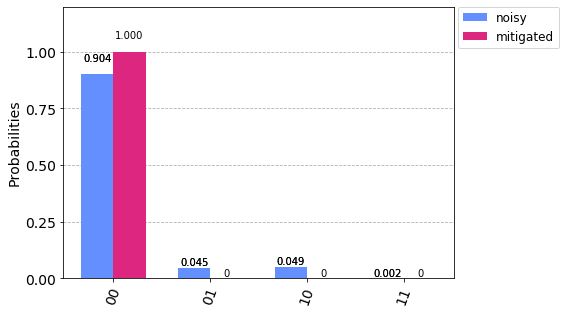

In [62]:
def simple_circuit(N):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc
N=2
qc = simple_circuit(N)
print(qc)
noise_model = get_noise(0.05)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
mitigated_counts = execute(qc,Aer.get_backend('qasm_simulator'),shots = 10000).result().get_counts()
noisy_counts = execute(qc,Aer.get_backend('qasm_simulator'),shots = 10000, noise_model=noise_model).result().get_counts()
mitigated_counts = conv_qubitbook(mitigated_counts)
mitigated_counts = dict(sorted(mitigated_counts.items()))
noisy_counts = conv_qubitbook(noisy_counts)
noisy_counts = dict(sorted(noisy_counts.items()))
print("shorted_mitigated_counts:{}\nshorted_noisy_counts:{}".format(mitigated_counts,noisy_counts))
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

# And for the circuit of interest:

          ┌─────────┐┌──────────┐┌──────────┐                       ░ ┌─┐   
q70_0: |0>┤ Rx(2.9) ├┤ Ry(6.09) ├┤ Rz(6.07) ├─■──────────■──────────░─┤M├───
          ├─────────┤├──────────┤├──────────┤ │zz(pi/3)  │zz(pi/3)  ░ └╥┘┌─┐
q70_1: |0>┤ Rx(2.9) ├┤ Ry(6.09) ├┤ Rz(6.07) ├─■──────────■──────────░──╫─┤M├
          └─────────┘└──────────┘└──────────┘                       ░  ║ └╥┘
 c70_0: 0 ═════════════════════════════════════════════════════════════╩══╬═
                                                                          ║ 
 c70_1: 0 ════════════════════════════════════════════════════════════════╩═
                                                                            
shorted_mitigated_counts:{'00': 6, '01': 256, '10': 254, '11': 9484}
shorted_noisy_counts:{'00': 57, '01': 660, '10': 661, '11': 8622}


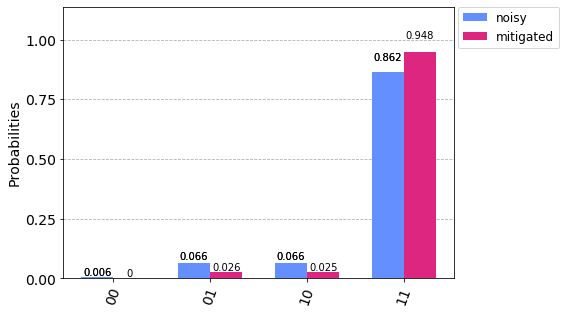

In [63]:
def trial_circuit(N,param,layers):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)
    #   Momentum eigenstate
    # qc.x(qr[0])
    # [qc.cx(qr[i],qr[i+1]) for i in range(N-1)]
    #qc.barrier()
    for l in range(layers):
        for i in range(N):
            qc.rx(param[3*i+3*N*l],qr[i])
            qc.ry(param[3*i+3*N*l+1],qr[i])
            qc.rz(param[3*i+3*N*l+2],qr[i])    
        [qc.rzz(np.pi/3,qr[i],qr[i+1]) for i in range(N-1)]
        if N!=1:
            qc.rzz(np.pi/3,qr[N-1],qr[0])
        qc.barrier()
        [qc.measure(qr[i], cr[i]) for i in range(N)]
    return qc

# qc.barrier()
#qc.x(qr[1])
#qc.x(qr[2])
#qc.unitary

N=2
layers = 1
# param = param_trial_new(N,layers)
param = [2.9, 6.09, 6.07,2.9, 6.09, 6.07, 2.9, 6.09, 6.07]
qc = trial_circuit(N,param,layers)
print(qc)

from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

mitigated_counts = execute(qc,Aer.get_backend('qasm_simulator'),shots = 10000).result().get_counts()
noisy_counts = execute(qc,Aer.get_backend('qasm_simulator'),shots = 10000, noise_model=noise_model).result().get_counts()
mitigated_counts = conv_qubitbook(mitigated_counts)
mitigated_counts = dict(sorted(mitigated_counts.items()))
noisy_counts = conv_qubitbook(noisy_counts)
noisy_counts = dict(sorted(noisy_counts.items()))
print("shorted_mitigated_counts:{}\nshorted_noisy_counts:{}".format(mitigated_counts,noisy_counts))
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

In [64]:
# For Periodic Boundary Conditions:
def compute_H1_PBC_noisy(N,NUM_SHOTS,param,J,layers):
    H1=0
    a=[]
    qc = circuit_PBC(N,param,layers)
    job_noisy = execute(qc,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS, noise_model=noise_model)
    noisy_results = job_noisy.result()
    noisy_counts = noisy_results.get_counts()
    noisy_counts = conv_qubitbook(noisy_counts) 
    #adds the non-measured states to the list to complete the set of possible 2**N configurations
    noisy_counts = dict(sorted(noisy_counts.items())) #sorts the dictionary of counts according to their key
    [a.append([int(d) for d in str(list(noisy_counts)[i])]) for i in range(len(list(noisy_counts)))]
    #now for the periodic boundary condition:
    a.append(a[0])
    #print("len(a):",len(a))
    shots = sum(noisy_counts.values())
    P1 = [(i, c/shots) for i, c in noisy_counts.items()]
    #print("probs:",P1)
    for i in range(N): #runs over the N pairs of consecutive qubits (in the case of pbc)
        for j in range(2**N): #runs over the set of 2**N states
            if i==N-1:
                if a[j][N-1]==a[j][0]:
                    H1 += J[i]*P1[j][1]
                if a[j][N-1]!=a[j][0]:
                    H1 -= J[i]*P1[j][1]
            else:
                if a[j][i]==a[j][i+1]:
                    H1 += J[i]*P1[j][1]
                if a[j][i]!=a[j][i+1]:
                    H1 -= J[i]*P1[j][1]
#             print("state:'{}' (qubits:{} and {}) H1={}".format(P[j][0],i,i+1,H1))
    #print("H1 =",H1)
    return H1

In [65]:
def compute_H2_PBC_noisy(N,NUM_SHOTS,param,h,layers):
    a2 = []
    H2 = 0
    qc2 = circuit2_PBC(N,param,layers)
    
    job2 = execute(qc2,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS,noise_model=noise_model)
    result2 = job2.result()
    counts2 = result2.get_counts()
    counts2 = conv_qubitbook(counts2)
    counts2 = dict(sorted(counts2.items())) #sorts the dictionary of counts according to their key
    [a2.append([int(d) for d in str(list(counts2)[i])]) for i in range(len(list(counts2)))]
    #print("counts after sorting:",counts)
    #split dictionary "count" keys into array elements
    #To account for the case where a register gives only one qubit with probability 1 after all shots
    shots2 = sum(counts2.values())
    P2 = [(i, c/shots2) for i, c in counts2.items()]
    #print("register[{}] a2={}".format(register,a2))
    #print("register[{}] P={}".format(register,P2))
    for i in range(N): #runs over the N qubits
        for j in range(2**N): #runs over the set of 2**N states
            if a2[j][i]==0:
                H2 += h[i]*P2[j][1]
            if a2[j][i]==1:
                H2 -= h[i]*P2[j][1]
    #print("H2 (i={},j={}):{}".format(i,j,H2))
    #print("H2 =",H2)
    return H2

In [66]:
def compute_RR_term_PBC_noisy(N,NUM_SHOTS,param0,param1,layers):
    a=[]
    qc = circuit_RR_PBC(N,param0,param1,layers)
    job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=NUM_SHOTS,noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()
    counts = conv_qubitbook(counts)
    counts = dict(sorted(counts.items())) #sorts the dictionary of counts according to their key
    [a.append([int(d) for d in str(list(counts)[i])]) for i in range(len(list(counts)))]
    shots = sum(counts.values())
    P = [(i, c/shots) for i, c in counts.items()]
    return P[0][1]

#  <center> <font color ='#4d4d33' size="7"> Lets combine these, to compute the expectation value $<\psi|H|\psi>$

In [67]:
noise_model = get_noise(0.05)

In [68]:
def expval_ising_PBC(param):
    NUM_SHOTS = 10000
    energy = 0
    H1 = 0
    H2 = 0
    N  = 10
    layers = 1
    h  = couplings(N)[0]
    J  = couplings(N)[1]
    H1 = compute_H1_PBC(N,NUM_SHOTS,param,J,layers)
    H2 = compute_H2_PBC(N,NUM_SHOTS,param,h,layers)
    energy = -H1-H2
    print("H  = -H1-H2 = ",energy)
    return energy

In [69]:
def expval_ising_excited_PBC(param):
    NUM_SHOTS = 10000
    energy = 0
    H1 = 0
    H2 = 0
    extra_term = 0
    N  = 10
    layers = 1
    h  = couplings(N)[0]
    J  = couplings(N)[1]
    param0 = [3.16593601, 0.5870495 , 3.19702625, 3.14733032]
    param1 = [0.14249406, 0.49552168, 0.05262382, 6.41659017]
    param2 = [ 2.7725361 ,  2.76782303,  2.34409267, -0.00460241]
    b =  2.5*np.array(b_h1j1_10d_k3)
    H1 = compute_H1_PBC(N,NUM_SHOTS,param,J,layers)
    H2 = compute_H2_PBC(N,NUM_SHOTS,param,h,layers)
    T1  = b[0]*compute_RR_term_PBC(N,NUM_SHOTS,param0,param,layers)
    T2  = b[1]*compute_RR_term_PBC_noisy(N,NUM_SHOTS,param1,param,layers)
    T3  = b[2]*compute_RR_term_PBC_noisy(N,NUM_SHOTS,param2,param,layers)
    energy = -H1-H2+T1+T2+T3
    print("H  = -H1-H2+T1= ",energy)
    return energy

In [70]:
N=10    # Number of qubits
layers=1 # Depth of circuit in layers
random.seed()
param = param_tight(N,layers)
# param = [6.19935611e+00, 5.76897791e+00, 3.29442118e+00, 3.39636612e-03]
print("param={}".format(param))

param=[1.13252139 4.38748916 0.3105454  0.02631475]


In [71]:
%%time
from qiskit import Aer, execute
#Backend represent either a simulator or a real quantum computer
backend = Aer.get_backend("qasm_simulator") #runs the quantum circuit
from qiskit.aqua.components.optimizers import COBYLA, NELDER_MEAD, SLSQP, SPSA, ADAM, CG, L_BFGS_B,TNC
# optimizer = COBYLA(maxiter=10000, tol=0.001)
# optimizer = NELDER_MEAD(maxiter=1000, tol=0.0001)
# optimizer = SLSQP(maxiter=1000, tol=0.001)
optimizer = SPSA(max_trials=1,  save_steps=1)
# optimizer = ADAM(maxiter=1000,tol=1e-06, lr=0.001)
# optimizer = CG(maxiter=1000)
# optimizer = L_BFGS_B(maxfun=1000, maxiter=1000)
# optimizer = TNC(maxiter=1000)
ret = optimizer.optimize(num_vars=len(param), objective_function=expval_ising_PBC, initial_point=param)
#the definition: optimize(num_vars, objective_function, gradient_function=None, variable_bounds=None, initial_point=None)
print("ret[0]:{}\n".format(repr(ret[0])))
# Obtain the output distribution using the final parameters
print("Minimal Energy:",expval_ising_PBC(ret[0]))
# param0 = repr(ret[0])
# param1 = param_tight(N,layers)
# ret1 = optimizer.optimize(num_vars = len(param0),)

H  = -H1-H2 =  0.853999999999995
H  = -H1-H2 =  1.055800000000013
H  = -H1-H2 =  -0.6283999999999974
H  = -H1-H2 =  2.0520000000000014
H  = -H1-H2 =  -10.582199999999998
ret[0]:array([ 9.47813581, 12.73310358,  8.65615982,  8.37192917])

H  = -H1-H2 =  -10.564399999999997
Minimal Energy: -10.564399999999997
CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.33 s


In [185]:

param0_h1j0_2d_zero_PBC = [ 2.86318104e+00,  4.71642697e+00,  2.80657294e-01, -1.43996226e-04]
#excited state choose b =  1.02*b_h1j0_2d_k1[0]
param1_h1j0_2d_zero_PBC = [0.06677361, 3.99599371, 5.20641368, 1.18342836]
param2_h1j0_2d_zero_PBC = [-0.2977879 , -2.34200468, -0.92849226,  0.96891335]
SPSA_E1_h1j0_2d_zero_PBC = [-2/2,0.01900400000000002/2,0.011223999999999967/2,1.9944000000000002/2]

param0_h1j05_2d_zero_PBC = [4.82807158, 3.75663047, 1.49903548, 4.71327985]
#excited state choose b =  1.05*b_h1j0_2d_k1[0]
param1_h1j05_2d_zero_PBC = [6.67405759, 6.4825141 , 2.53691141, 2.4705703 ]
#excited state choose b =  2*b_h1j1_2d_k2[0]
SPSA_E1_h1j05_2d_zero_PBC = [-2.0144/2,-0.8756035573100002/2,0.639530935512/2]

#---------------------------------------------------------------------------------

param0_h1j1_2d_zero_PBC = [3.12084037, 3.67284077, 6.29921481, 0.01534387]
#excited state choose b =  100*b_h1j1_2d_k1[0]
param1_h1j1_2d_zero_PBC = [5.44895469, 2.57547367, 6.74659986, 3.9134064 ] 
#excited state choose b = 10*b_h1j1_2d_k2[0] # b =  15*b_h1j1_2d_k2[0]  # b =  50*b_h1j1_2d_k2[0] 
param2_h1j1_2d_zero_PBC = [0.91191516, 4.06894838, 2.15298334, 4.70944444] # [3.41674793, 5.13551011, 6.01431208, 1.56757815] # [1.99068279, 5.76606664, 1.38358669, 1.57075722] 
#excited state choose b = 10*b_h1j1_2d_k3[0]
SPSA_E1_h1j1_2d_zero_PBC = [-2.4868/2,-1.3457561351999998/2,2.3699290035200002/2,3.3380519460800007/2]# 5.6241770516 #  10.896797315680002# 

param0_h1j1_3d_zero_PBC = [0.25991499, 2.70011363, 6.83689095, 3.14700451]
#excited state choose b =  100*b_h1j1_3d_k1[0]
param1_h1j1_3d_zero_PBC = [-0.14188515,  5.96887753,  2.38025004,  0.56219048]
#excited state choose b =  10*b_h1j1_3d_k2[0]
param2_h1j1_3d_zero_PBC = [3.72605584, 4.86082997, 5.56604115, 4.64442416]
#excited state choose b =  10*b_h1j1_3d_k3[0]
param3_h1j1_3d_zero_PBC = [4.62620693, 6.57332997, 4.55493627, 4.63979639]
SPSA_E1_h1j1_3d_zero_PBC = [-3.7405999999999997/3,-3.4911894697999992/3,0.37211273932/3,0.5685082873399998/3]

param0_h1j1_4d_zero_PBC = [ 3.16059684,  3.67164727, -0.04664188,  6.29177055]
#excited state choose b =  100*b_h1j1_4d_k1[0]
param1_h1j1_4d_zero_PBC = [3.45689455, 0.17095631, 6.23342115, 7.32208424]
#excited state choose b =  2*b_h1j1_4d_k1[0]
param2_h1j1_4d_zero_PBC = [1.54979676, 3.34734211, 8.25687517, 7.03725764]
param3_h1j1_4d_zero_PBC = [0.49427814, 4.81010242, 2.05107808, 2.3416132 ]
SPSA_E1_h1j1_4d_zero_PBC = [-5.0085999999999995/4,-4.703557288000001/4, -0.4450368554080004/4,0.11944599689600083/4]

param0_h1j1_6d_zero_PBC = [5.87423573, 2.8068435 , 5.35324966, 6.2783681 ]
#excited state choose b =  100*b_h1j1_6k_k1[0]
param1_h1j1_6d_zero_PBC = [2.69946471, 3.30565688, 6.58426409, 3.63939956]
#excited state choose b =  100*b_h1j1_6d_k2[0]
param2_h1j1_6d_zero_PBC = [2.21123978, 2.21481456, 2.87637153, 5.5651538 ]
# param3_h1j1_6d_zero_PBC = 
SPSA_E1_h1j1_6d_zero_PBC = [-7.465799999999997/6,-7.3910944763999975/6, 0.0074112306000001585/6,0.28612266280000065/6]

param0_h1j1_8d_zero_PBC = [0.49430382, 3.30407035, 1.79699333, 3.10631074]
#excited state choose b =  1000*b_h1j1_8d_k1[0]
param1_h1j1_8d_zero_PBC = [ 6.05535923, -0.47543523,  3.61369112,  6.27813742]
#excited state choose b =  10*b_h1j1_8d_k2[0]
param2_h1j1_8d_zero_PBC = [1.57846359, 1.61562793, 1.78664846, 6.25988376]
param3_h1j1_8d_zero_PBC = [4.27297846, 0.40149162, 4.23437136, 1.1583973 ]
SPSA_E1_h1j1_8d_zero_PBC = [-7.503600000000002/8,-9.995800000000001/8,-5.145988158960004/8,-0.3737505319999992/8]

param0_h1j1_10d_zero_PBC = [6.19935611e+00, 5.76897791e+00, 3.29442118e+00, 3.39636612e-03]
#excited state choose b =  100*b_h1j1_8d_k1[0]
param1_h1j1_10d_zero_PBC = [ 0.45863779, -2.88871338,  2.02616112, -0.00845631]
#excited state choose b =  10*b_h1j1_8d_k1[0]
param2_h1j1_10d_zero_PBC = [2.20323746, 1.54285324, 2.21154837, 6.26905303]
param3_h1j1_10d_zero_PBC = [4.67704863, 1.0518099 , 4.91706635, 6.31054595]
SPSA_E1_h1j1_10d_zero_PBC = [-12.477800000000006/10,-12.438200000000009/10,-8.697301427009997/10,-7.1770732251100515/10]


In [67]:

param0_h1j1_2d_zero_PBC_noisy005 = [2.90379702, 0.55011953, 5.82865443, 1.55056009]
#excited state choose b =  10*b_h1j1_4d_k1[0]
param1_h1j1_2d_zero_PBC_noisy005 = [5.75910859, 3.20044886, 4.65605141, 3.16364798]
#excited state choose b =  3*b_h1j1_4d_k2[0]
param2_h1j1_2d_zero_PBC_noisy005 = [3.51181412, 0.41456848, 0.73926446, 4.70211027]
#excited state choose b =  3*b_h1j1_4d_k3[0]
param3_h1j1_2d_zero_PBC_noisy005 = [0.24618881, 2.66627399, 3.49244168, 1.53147343]
SPSA_E1_h1j1_2d_zero_PBC_noisy005 = [-2.1260000000000003/2,-1.5590235306399993/2,3.7338264877119998/2,5.457367508880001/2]

param0_h1j1_3d_zero_PBC_noisy005 = [ 5.86401002,  3.3939521 ,  3.32558492, -0.45318801]
#excited state choose b =  100*b_h1j1_3d_k1[0]
param1_h1j1_3d_zero_PBC_noisy005 = [-0.50491231,  2.99536078, -1.39568349,  6.24546053]
#excited state choose b =  2,5*b_h1j1_3d_k2[0]
param2_h1j1_3d_zero_PBC_noisy005 = [ 5.8566956 , -0.30630467,  4.06167638,  3.18450813]
#excited state choose b =  2,5*b_h1j1_3d_k3[0]
param3_h1j1_3d_zero_PBC_noisy005 = [3.01700103, 0.50421446, 2.8078342 , 3.097065  ]
SPSA_E1_h1j1_3d_zero_PBC_noisy005 = [-3.1306000000000003/3,-3.3428431700819994/3,0.5663731682450006/3,0.6460218795849997/3]

param0_h1j1_4d_zero_PBC_noisy005 = [3.52106241, 2.66393148, 3.83748607, 3.15069587]
#excited state choose b =  10*b_h1j1_4d_k1[0]
param1_h1j1_4d_zero_PBC_noisy005 = [2.64427585, 2.98044998, 1.82441609, 3.15453355]
#excited state choose b =  10*b_h1j1_4d_k1[0]
param2_h1j1_4d_zero_PBC_noisy005 = [2.61666484, 3.10755364, 1.64956903, 6.2727925 ]
param3_h1j1_4d_zero_PBC_noisy005 = [-0.35858026,  3.53341019,  3.66559324,  2.99677361]
SPSA_E1_h1j1_4d_zero_PBC_noisy005 = [-4.2414000000000005/4,-4.06882932504/4,-1.7556424047950019/4,-1.3252123747249995/4]

param0_h1j1_6d_zero_PBC_noisy005 = [ 3.61996238,  3.48111905, -0.99898914,  3.16044962]
#excited state choose b =  10*b_h1j1_6d_k1[0]
param1_h1j1_6d_zero_PBC_noisy005 = [2.67867203, 6.36393931, 2.38932533, 3.4919268 ]
#excited state choose b =  2.5*b_h1j1_6d_k2[0]
param2_h1j1_6d_zero_PBC_noisy005 = [ 3.40156156,  5.82068617, -0.57010712, -0.01398148]
param3_h1j1_6d_zero_PBC_noisy005 = [6.77720141, 3.32420442, 1.87532304, 3.11993766]
SPSA_E1_h1j1_6d_zero_PBC_noisy005 = [-6.327200000000002/6,-6.789304962920001/6,-5.305198084817498/6,-4.948401260497498/6]

param0_h1j1_8d_zero_PBC_noisy005 = [-0.34754023,  3.61790367,  3.77155952, -0.01538117]
#excited state choose b =  10*b_h1j1_8d_k1[0] #b =  100*b_h1j1_8d_k1[0]
param1_h1j1_8d_zero_PBC_noisy005 = [2.62891713, 0.12316639, 1.74342209, 3.12061187]#[-0.52102551,  3.25373983,  4.56639863,  3.18956338]
#excited state choose b =  2.5*b_h1j1_8d_k2[0]
param2_h1j1_8d_zero_PBC_noisy005 = [0.17924234, 0.48972938, 6.53489879, 0.06630828]
#excited state choose b =  2.5*b_h1j1_8d_k3[0]
param3_h1j1_8d_zero_PBC_noisy005 = [3.61264646, 2.92479289, 4.59325371, 6.1257044 ]
SPSA_E1_h1j1_8d_zero_PBC_noisy005 = [-8.501399999999986/8,-9.50015076399999/8,-8.264730591584991/8,-8.014846231782503/8]#2:-5.371764543999985


param0_h1j1_10d_zero_PBC_noisy005 = [3.16593601, 0.5870495 , 3.19702625, 3.14733032]
#excited state choose b =  10*b_h1j1_10d_k1[0]
param1_h1j1_10d_zero_PBC_noisy005 = [0.14249406, 0.49552168, 0.05262382, 6.41659017]
#excited state choose b =  2.5*b_h1j1_10d_k2[0]
param2_h1j1_10d_zero_PBC_noisy005 = [ 2.7725361 ,  2.76782303,  2.34409267, -0.00460241]
#excited state choose b =  2.5*b_h1j1_10d_k3[0]
param3_h1j1_10d_zero_PBC_noisy005 = [-0.50570681,  6.11008395, -1.85656161,  6.27613617]
SPSA_E1_h1j1_10d_zero_PBC_noisy005 = [-10.63519999999997/10,-12.536199999999997/10,-10.710880376742471/10,-10.322271198514084/10]

#  <center> <font color ='#4d4d33' size="7"> Plots

In [120]:
y_h1j1_4d_zero_th = [E_h1j1_4d_th['0'],E_h1j1_4d_th['1'],E_h1j1_4d_th['2'],E_h1j1_4d_th['3']]
print(y_h1j1_4d_zero_th,np.array(y_h1j1_4d_zero_th)/4)

[-5.22625186, -4.82842712, -2.1647844, -2.0] [-1.30656296 -1.20710678 -0.5411961  -0.5       ]


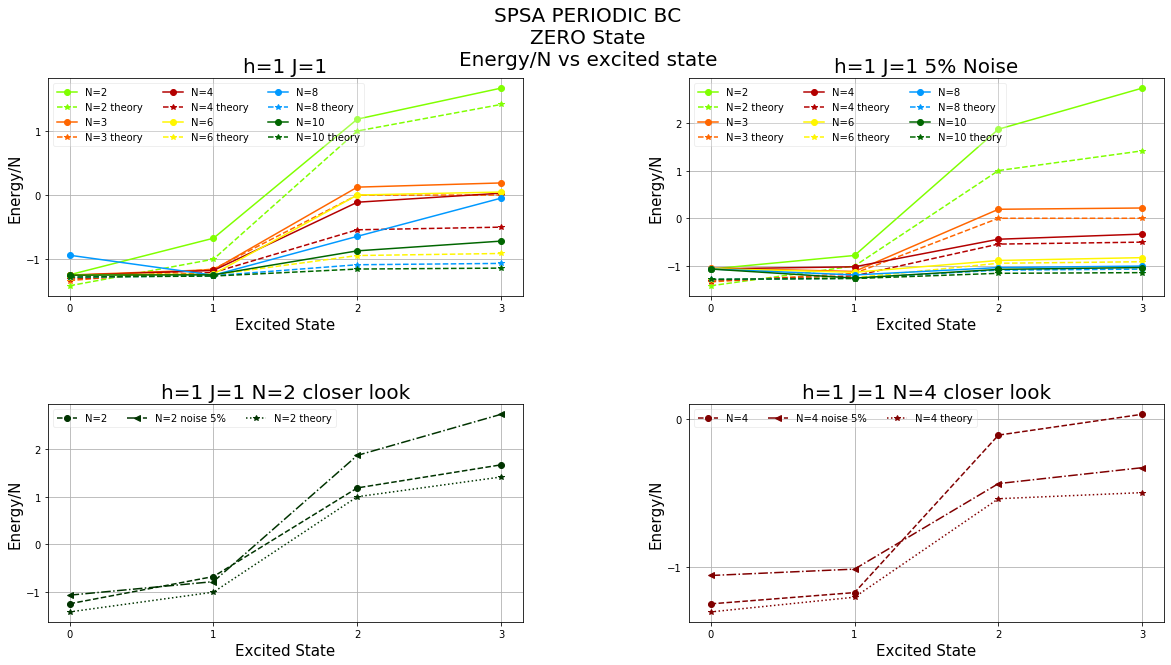

In [82]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
fig.suptitle('SPSA PERIODIC BC\nZERO State\nEnergy/N vs excited state',fontsize=20)
state = np.linspace(0,3,4)
axs[0,0].title.set_text("h=1 J=1")
axs[0,0].title.set_size(20)
y_h1j1_2d_zero = pd.Series(np.array(SPSA_E1_h1j1_2d_zero_PBC))
y_h1j1_2d_zero_th = [E_h1j1_2d_th['0'],E_h1j1_2d_th['1'],E_h1j1_2d_th['2'],E_h1j1_2d_th['3']]
y_h1j1_3d_zero = pd.Series(np.array(SPSA_E1_h1j1_3d_zero_PBC))
y_h1j1_3d_zero_th = [E_h1j1_3d_th['0'],E_h1j1_3d_th['1'],E_h1j1_3d_th['2'],E_h1j1_3d_th['3']]
y_h1j1_4d_zero = pd.Series(np.array(SPSA_E1_h1j1_4d_zero_PBC))
y_h1j1_4d_zero_th = [E_h1j1_4d_th['0'],E_h1j1_4d_th['1'],E_h1j1_4d_th['2'],E_h1j1_4d_th['3']]
y_h1j1_6d_zero = pd.Series(np.array(SPSA_E1_h1j1_6d_zero_PBC))
y_h1j1_6d_zero_th = [E_h1j1_6d_th['0'],E_h1j1_6d_th['1'],E_h1j1_6d_th['2'],E_h1j1_6d_th['3']]
y_h1j1_8d_zero = pd.Series(np.array(SPSA_E1_h1j1_8d_zero_PBC))
y_h1j1_8d_zero_th = [E_h1j1_8d_th['0'],E_h1j1_8d_th['1'],E_h1j1_8d_th['2'],E_h1j1_8d_th['3']]
y_h1j1_10d_zero = pd.Series(np.array(SPSA_E1_h1j1_10d_zero_PBC))
y_h1j1_10d_zero_th = [E_h1j1_10d_th['0'],E_h1j1_10d_th['1'],E_h1j1_10d_th['2'],E_h1j1_10d_th['3']]

axs[0,0].plot( state,y_h1j1_2d_zero,  linestyle='-', marker='o',color ='#80ff00' ,label = 'N=2')
axs[0,0].plot(  state,np.array(y_h1j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[0,0].plot( state,y_h1j1_3d_zero,  linestyle='-', marker='o',color ='#ff6600' ,label = 'N=3')
axs[0,0].plot(  state,np.array(y_h1j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[0,0].plot( state,y_h1j1_4d_zero,  linestyle='-', marker='o',color ='#b30000' ,label = 'N=4')
axs[0,0].plot(  state,np.array(y_h1j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[0,0].plot( state,y_h1j1_6d_zero,  linestyle='-', marker='o',color ='#fff600' ,label = 'N=6')
axs[0,0].plot(  state,np.array(y_h1j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[0,0].plot( state,y_h1j1_8d_zero,  linestyle='-', marker='o',color ='#0099ff' ,label = 'N=8')
axs[0,0].plot(  state,np.array(y_h1j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[0,0].plot( state,y_h1j1_10d_zero,  linestyle='-', marker='o',color ='#006600' ,label = 'N=10')
axs[0,0].plot(  state,np.array(y_h1j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')

# axs[0,0].plot( y_h1j1_n12_const, depth, linestyle='-', marker='*',color ='#80ff00',label = '12 qubits const')
# axs[0,0].plot( y_h1j1_n12_tigh, depth, linestyle='-', marker='*',color ='#ff6600',label = '4 qubits tight')
# axs[0,0].plot( y_h1j1_n4_const, depth, linestyle='-', marker='>',color ='#fff600',label = '4 qubits const')

axs[0,0].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[0,0].grid()

axs[0,1].title.set_text("h=1 J=1 5% Noise")
axs[0,1].title.set_size(20)
y_h1j1_2d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_2d_zero_PBC_noisy005))
y_h1j1_3d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_3d_zero_PBC_noisy005))
y_h1j1_4d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_4d_zero_PBC_noisy005))
y_h1j1_6d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_6d_zero_PBC_noisy005))
y_h1j1_8d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_8d_zero_PBC_noisy005))
y_h1j1_10d_zero_noisy005 = pd.Series(np.array(SPSA_E1_h1j1_10d_zero_PBC_noisy005))


axs[0,1].plot( state,y_h1j1_2d_zero_noisy005,  linestyle='-', marker='o',color ='#80ff00' ,label = 'N=2')
axs[0,1].plot(  state,np.array(y_h1j1_2d_zero_th)/2, linestyle='--', marker='*',color ='#80ff00' ,label = 'N=2 theory')
axs[0,1].plot( state,y_h1j1_3d_zero_noisy005,  linestyle='-', marker='o',color ='#ff6600' ,label = 'N=3')
axs[0,1].plot(  state,np.array(y_h1j1_3d_zero_th)/3, linestyle='--', marker='*',color ='#ff6600' ,label = 'N=3 theory')
axs[0,1].plot( state,y_h1j1_4d_zero_noisy005,  linestyle='-', marker='o',color ='#b30000' ,label = 'N=4')
axs[0,1].plot(  state,np.array(y_h1j1_4d_zero_th)/4, linestyle='--', marker='*',color ='#b30000' ,label = 'N=4 theory')
axs[0,1].plot( state,y_h1j1_6d_zero_noisy005,  linestyle='-', marker='o',color ='#fff600' ,label = 'N=6')
axs[0,1].plot(  state,np.array(y_h1j1_6d_zero_th)/6, linestyle='--', marker='*',color ='#fff600' ,label = 'N=6 theory')
axs[0,1].plot( state,y_h1j1_8d_zero_noisy005,  linestyle='-', marker='o',color ='#0099ff' ,label = 'N=8')
axs[0,1].plot(  state,np.array(y_h1j1_8d_zero_th)/8, linestyle='--', marker='*',color ='#0099ff' ,label = 'N=8 theory')
axs[0,1].plot( state,y_h1j1_10d_zero_noisy005,  linestyle='-', marker='o',color ='#006600' ,label = 'N=10')
axs[0,1].plot(  state,np.array(y_h1j1_10d_zero_th)/10, linestyle='--', marker='*',color ='#006600' ,label = 'N=10 theory')
axs[0,1].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[0,1].grid()

axs[1,0].title.set_text("h=1 J=1 N=2 closer look")
axs[1,0].title.set_size(20)
axs[1,0].plot( state,y_h1j1_2d_zero,  linestyle='--', marker='o',color ='#003300' ,label = 'N=2')
axs[1,0].plot( state,y_h1j1_2d_zero_noisy005,  linestyle='-.', marker='<',color ='#003300' ,label = 'N=2 noise 5%')
axs[1,0].plot(  state,np.array(y_h1j1_2d_zero_th)/2, linestyle=':', marker='*',color ='#003300' ,label = 'N=2 theory')
axs[1,0].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[1,0].grid()

axs[1,1].title.set_text("h=1 J=1 N=4 closer look")
axs[1,1].title.set_size(20)
axs[1,1].plot( state,y_h1j1_4d_zero,  linestyle='--', marker='o',color ='#800000' ,label = 'N=4')
axs[1,1].plot( state,y_h1j1_4d_zero_noisy005,  linestyle='-.', marker='<',color ='#800000' ,label = 'N=4 noise 5%')
axs[1,1].plot(  state,np.array(y_h1j1_4d_zero_th)/4, linestyle=':', marker='*',color ='#800000' ,label = 'N=4 theory')
axs[1,1].legend(shadow=False,framealpha=0.3, ncol=3,fancybox=True)
axs[1,1].grid()

for ax in axs.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel='Excited State', ylabel='Energy/N')
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [21]:
import numpy as np
E_h1j1_2d_th = {'0':-2.82842712,'1':-2,'2':2,'3':2.82842712}
the_values = np.array(E_h1j1_2d_th.values())
print(type(repr(the_values)))
print(repr(the_values))

<class 'str'>
array(dict_values([-2.82842712, -2, 2, 2.82842712]), dtype=object)
